# 1 .- Representación de tweets con esquemas numéricos vectoriales

In [1]:
import pandas as pd

# Cargando el archivo CSV
file_path = 'Tweets.csv'
tweets_df = pd.read_csv(file_path)

# Mostrando las primeras filas del DataFrame para entender su estructura
tweets_df.head()

,created_at,date,place,tweet,language,hashtags,nlikes,nreplies,nretweets,reply_to,clean_tweet,lemma_tweet,clean_tag,lemma_tag,sector,dia,short,clean_class,lemma_class
0,1.604175e+12,2020-10-31 17:11:59,Si,"#calvin está raja, pero raja flojeando en esta...",es,"['calvin', 'pandemia', 'iquique', 'tarapaca', ...",0,0,0,No,"['calvin', 'raja', 'raja', 'flojeando', 'pande...","['calvin', 'raja', 'raja', 'flojear', 'pandemi...","0,1,10","0,1,10",1,Sabado,No,Negativo,Negativo
1,1.604170e+12,2020-10-31 15:45:28,No,@claudioapruebo5 @NuevaConstituc3 Abren fantas...,es,[],20,0,12,Si,"['abren', 'fantasilandia', 'permiten', 'visite...","['abren', 'fantasilandia', 'permiten', 'visite...","1,1,18","1,1,18",1,Sabado,No,Neutro,Neutro
2,1.604162e+12,2020-10-31 13:25:02,No,▶️Autoridades dan a conocer el reporte actuali...,es,"['covid_19', 'tarapacá', 'iquique', 'altohospi...",0,0,0,No,"['autoridades', 'dan', 'conocer', 'reporte', '...","['autoridad', 'dan', 'conocer', 'reporte', 'ac...","0,1,16","1,1,16",1,Sabado,No,Negativo,Neutro
3,1.604156e+12,2020-10-31 11:49:33,No,"Reporte COVID-19, Tarapacá, 31/10/2020. 🕑 @u...",es,[],1,1,1,No,"['reporte', 'covid', '19', 'tarapacá', '31', '...","['reporte', 'covir', '19', 'tarapacá', '31', '...","1,0,30","1,4,30",1,Sabado,No,Positivo,Negativo
4,1.604153e+12,2020-10-31 10:55:10,No,👉🏼🦹🏻‍♀️Conoce las actividades de riesgo modera...,es,"['covid_19', 'halloween', 'cuidémonosentretodo...",0,1,0,No,"['conoce', 'actividades', 'riesgo', 'moderado'...","['conocer', 'actividad', 'riesgo', 'moderado',...","0,2,13","0,3,13",1,Sabado,No,Negativo,Negativo


In [2]:
# Tomamos los primeros 85,000 datos
df_subset_1 = tweets_df.head(85000).copy()

# Guardamos el resto del conjunto de datos
df_subset_2 = tweets_df.tail(len(tweets_df) - 85000).copy()

# Guarda los nuevos archivos CSV
df_subset_1.to_csv('subset_1.csv', index=False)
df_subset_2.to_csv('subset_2.csv', index=False)

In [3]:
# Inspeccionando los primeros elementos de la columna 'clean_tweet'
df_subset_1['clean_tweet'].head()

0    ['calvin', 'raja', 'raja', 'flojeando', 'pande...
1    ['abren', 'fantasilandia', 'permiten', 'visite...
2    ['autoridades', 'dan', 'conocer', 'reporte', '...
3    ['reporte', 'covid', '19', 'tarapacá', '31', '...
4    ['conoce', 'actividades', 'riesgo', 'moderado'...
Name: clean_tweet, dtype: object

In [4]:
import ast  # Importando ast para convertir cadenas en listas

# Convertir las cadenas de 'clean_tweet' en listas de palabras
df_subset_1['clean_tweet_list'] = df_subset_1['clean_tweet'].apply(ast.literal_eval)

# Verificando las primeras filas después de la conversión
df_subset_1['clean_tweet_list'].head()

0    [calvin, raja, raja, flojeando, pandemia, iqui...
1    [abren, fantasilandia, permiten, visite, deudo...
2    [autoridades, dan, conocer, reporte, actualiza...
3    [reporte, covid, 19, tarapacá, 31, 10, 2020, i...
4    [conoce, actividades, riesgo, moderado, evitar...
Name: clean_tweet_list, dtype: object

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Uniendo las palabras en cada lista para formar un texto completo para cada tweet
df_subset_1['clean_tweet_joined'] = df_subset_1['clean_tweet_list'].apply(lambda x: ' '.join(x))

# Creando el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limitando a 5000 características para evitar excesiva dimensionalidad

# Aplicando el vectorizador a los textos de los tweets
tfidf_matrix = tfidf_vectorizer.fit_transform(df_subset_1['clean_tweet_joined'])

# Mostrando las dimensiones de la matriz TF-IDF resultante
tfidf_matrix.shape

(85000, 5000)

# Identificación de grupos significativos de opiniones

In [6]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Paso 1: Calcular la Similitud del Coseno
#cosine_sim = cosine_similarity(tfidf_matrix)
#print(cosine_sim)

C:\Users\Guillermo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


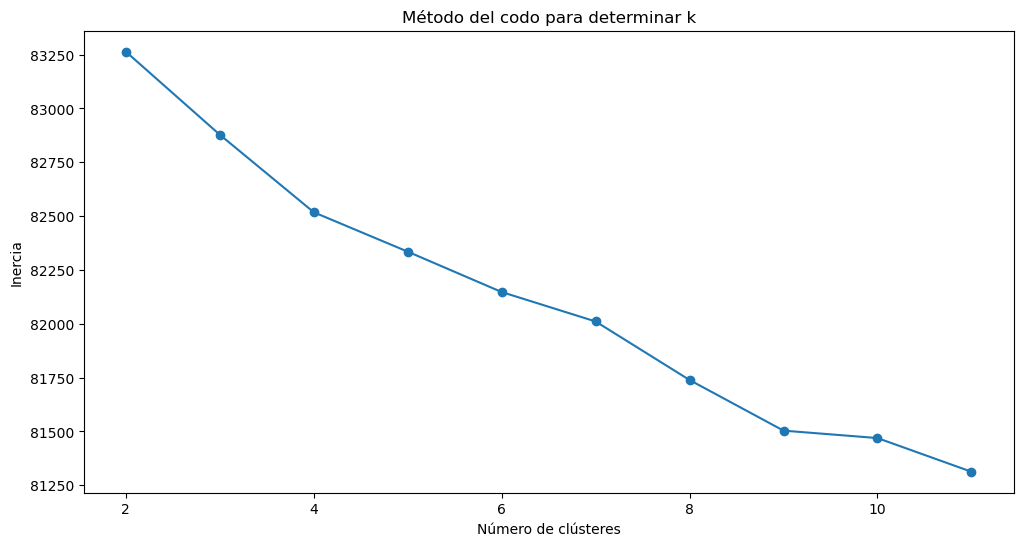

In [7]:
# Paso 2: Aplicar K-Means Clustering
# Determinar el número óptimo de clústeres (k)
# Aquí utilizamos un rango de 2 a 11
inertia = []
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo para encontrar el mejor valor de k
plt.figure(figsize=(12, 6))
plt.plot(range(2, 12), inertia, marker='o')
plt.title('Método del codo para determinar k')
plt.xlabel('Número de clústeres')
plt.ylabel('Inercia')
plt.show()

In [8]:
# Elegimos un valor de k basado en el método del codo
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)

In [9]:
# Paso 3: Análisis de los Clústeres
# Agregar la información de clúster al DataFrame para análisis
df_subset_1['cluster'] = clusters

In [10]:
# Identificar los Tweets más Representativos de Cada Clúster
# Esto se hace encontrando los tweets más cercanos a cada centroide de clúster

def find_representative_tweets(tfidf_matrix, kmeans_model, n_tweets=3):
    """
    Encuentra los tweets más representativos (más cercanos a los centroides) para cada clúster.
    :param tfidf_matrix: Matriz TF-IDF de los tweets.
    :param kmeans_model: Modelo K-Means entrenado.
    :param n_tweets: Número de tweets representativos a encontrar por clúster.
    :return: Un diccionario con clústeres como claves y los índices de los tweets más representativos como valores.
    """
    representative_tweets = {}
    centroids = kmeans_model.cluster_centers_

    for i in range(k):
        # Distancias de todos los puntos en el clúster al centroide
        distances = cosine_similarity(tfidf_matrix[kmeans_model.labels_ == i], [centroids[i]])
        # Índices de los n_tweets más cercanos al centroide
        top_indices = distances.flatten().argsort()[-n_tweets:][::-1]
        representative_tweets[i] = top_indices

    return representative_tweets

In [11]:
representative_tweets = find_representative_tweets(tfidf_matrix, kmeans)

In [12]:
# Mostrar los tweets más representativos de cada clúster
for cluster, tweet_indices in representative_tweets.items():
    print(f"Cluster {cluster}:")
    for index in tweet_indices:
        print(f"- {tweets_df.iloc[index]['tweet']}")
    print("\n")

Cluster 0:
- La responsabilidad de cuidarnos es de todos!  #yomecuido  #yotecuido  #quedateencasa  #coronavirus  #pandemia en Antofagasta, Chile  https://t.co/2flHpFAKIq
- BBC Mundo - Coronavirus: qué están haciendo las grandes economías para evitar la bancarrota de las empresas y la escasez de dinero (y hasta dónde pueden llegar)  https://t.co/jPp0HWte7H
- Gobierno implementa intenso monitoreo de las medidas frente al coronavirus en la región.  https://t.co/NvYhdOQbgA en Coquimbo Region  https://t.co/UYMKzWJWWc


Cluster 1:
- Se imaginan que a los funcionarios del compin que están contagiados de covid-19 les rechacen las licencias ?
- No encontré alcohol gel, me sirve el absenta ? 🙄 #MeQuedoEnCasa #CoronavirusChile #covid19chile #CuarentenaCoronavirus #Chile #YoMeQuedoEnMiCasa #RechazoStarbucks #coronavirus #Iquique  https://t.co/k8DGzt5Etx
- Invitamos a los adultos mayores 65 y mas sin problemas de salud para vacunar, en recinto Terminal Agropecuario #Iquique #Chile #FelizSabado #Gra

Cluster 0 -> Enfoque en la Prevención y Responsabilidad Colectiva: Los tweets en este clúster parecen centrarse en la promoción de la responsabilidad personal y colectiva en la prevención de la propagación del COVID-19. Por ejemplo, mencionan quedarse en casa, cuidarse mutuamente, y señalan esfuerzos gubernamentales para monitorear las medidas contra el coronavirus. Este clúster podría estar reflejando una actitud más proactiva y comunitaria hacia la pandemia.

Cluster 1 -> Información Práctica y Protección Personal: Este clúster incluye tweets que abordan aspectos prácticos de la pandemia, como la búsqueda de alcohol gel, vacunación de adultos mayores, y posiblemente una dosis de humor o ironía. Este grupo parece enfocarse en la vida cotidiana durante la pandemia, incluyendo medidas de protección personal y consejos prácticos.

Cluster 2 -> Experiencias Personales y Conversaciones Informales: Los tweets de este clúster parecen reflejar experiencias personales y conversaciones más informales relacionadas con el COVID-19. Podría incluir expresiones de opiniones personales, intercambios entre usuarios, y posiblemente algunas reflexiones humorísticas o ligeras sobre la situación.

Cluster 3 -> Crítica y Análisis del Manejo de la Pandemia: Este clúster parece contener tweets que critican o analizan la gestión de la pandemia, con un enfoque en la responsabilidad de las autoridades y la equidad en la aplicación de medidas. Puede reflejar una perspectiva más crítica o analítica sobre cómo se ha manejado la situación y sus impactos en diferentes grupos.

# 2.- Rotulación de datos en base a la orientación de cada Tweet


## Eliminamos URL y menciones
Los tweets suelen contener información no relevante para el análisis de sentimientos, como URLs y menciones a otros usuarios. La limpieza de dichos datos nos ayuda a eliminar este ruido y centrarse en el contenido textual. 

In [15]:
import re

# Función para limpiar cada tweet
def clean_tweet(tweet):
    # Eliminar URLs
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Eliminar menciones a usuarios
    tweet = re.sub(r'@\w+', '', tweet)
    return tweet

# Aplicar la función de limpieza a los tweets
df_subset_1['cleaned_tweet'] = df_subset_1['tweet'].apply(clean_tweet)

# Verificar los resultados
df_subset_1[['tweet', 'cleaned_tweet']].head()

,tweet,cleaned_tweet
0,"#calvin está raja, pero raja flojeando en esta...","#calvin está raja, pero raja flojeando en esta..."
1,@claudioapruebo5 @NuevaConstituc3 Abren fantas...,Abren fantasilandia y no permiten que uno vi...
2,▶️Autoridades dan a conocer el reporte actuali...,▶️Autoridades dan a conocer el reporte actuali...
3,"Reporte COVID-19, Tarapacá, 31/10/2020. 🕑 @u...","Reporte COVID-19, Tarapacá, 31/10/2020. 🕑 ..."
4,👉🏼🦹🏻‍♀️Conoce las actividades de riesgo modera...,👉🏼🦹🏻‍♀️Conoce las actividades de riesgo modera...


## Análisis de frecuencias
Se utiliza un analisis de frecuencias para entender la distribucion de las etiquetas de sentimientos en el conjunto de datos después de la limpieza y rotulación. 
Las frecuencias proporcionan información sobre la proporción de tweets clasificados en cada categoría de sentimiento. En el contexto se pueden visualizar cuantos tweets son positivos, negativos o neutros en el conjunto de datos. 

In [43]:
#Se encuentran los sentimientos y se cuenta la frecuencia de cada etiqueta de sentimiento en la columna 'clean_class'.
sentiment_counts = df_subset_1['clean_class'].value_counts()
#Separar los sentimientos por color asociado.
colors = {'Positivo': "#00ba38", 'Negativo': "#f8766d", 'Neutro' : 'gray'}
#Imprimir los sentimientos encontrados.
print(sentiment_counts)

Positivo           26328
No Clasificable    24620
Negativo           24233
Neutro              9819
Name: clean_class, dtype: int64


##  Visualización en base a la orientación de cada Tweet - Por cantidad 
Se realiza una visualización de la distribución de los tweets clasificados en positivos, negativos y neutros. Mediante un grafico de barras indicando las cantidades. 
En esta parte nos centramos en la visualización de la distribución de sentimientos mediante un grafico de barras, destacando las cantidades y proporcionando elementos visuales para una interpretación mas clara.

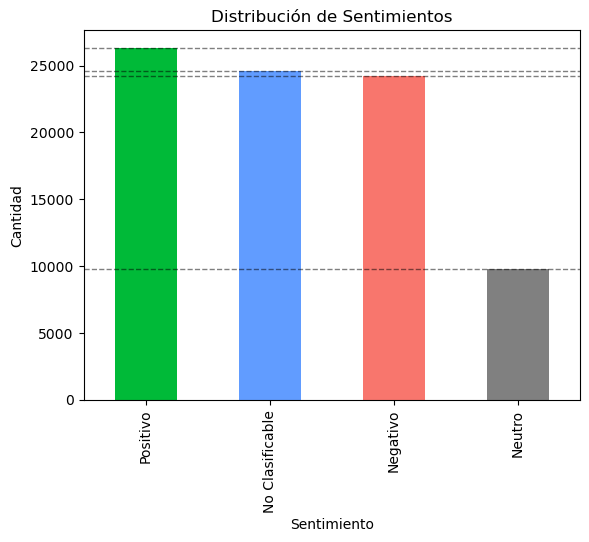

In [74]:
import matplotlib.pyplot as plt

#Seleccionamos los colores para identificar las distintas emociones.
#Recorrimos los colores y las distribuciones, y si no se encuentra un color asociado a la emocion se pintara gris.
bar_colors = [colors.get(sentiment, "#619cff" ) for sentiment in sentiment_counts.index]
ax = sentiment_counts.plot(kind='bar', color=bar_colors)
#Se agregan atributos visibles como puede ser unas lineas punteadas para tener mejor visualización del gráfico.
for p in ax.patches:
    ax.axhline(p.get_height(), color='black', linewidth=1, linestyle='dashed', alpha=0.5)
ax.grid(axis='y', alpha=0.2, linestyle='-')
    
#Implementamos el gráfico de barras con sus columnas correspondientes
sentiment_counts.plot(kind='bar', color=bar_colors)
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')
plt.show()

##  Visualización en base a la orientación de cada Tweet - Por fecha
Primero preparamos los datos para que las marcas de tiempo estén en un formato adecuado para el análisis de series temporales, es decir, convertir a un tipo de dato 'datetime' de pandas.
Además de considerar únicamente los datos que son catalogados como 'Positivo', 'Negativo' y 'Neutro' omitiendo la categoria 'No clasificable'.

In [18]:
df_subset_1['date'] = pd.to_datetime(df_subset_1['date'])

# Filtrar y conservar solo los tweets clasificados como Positivo, Negativo o Neutro
filtered_tweets = df_subset_1[df_subset_1['clean_class'].isin(['Positivo', 'Negativo', 'Neutro'])]

In [19]:
# Agrupar por fecha y sentimiento, y contar las ocurrencias
sentiment_trends = filtered_tweets.groupby([filtered_tweets['date'].dt.date, 'clean_class']).size().unstack().fillna(0)

Se visualiza estas tendencias en un gráfico de líneas para ver cómo los sentimientos Positivo, Negativo y Neutro han cambiado con el tiempo.

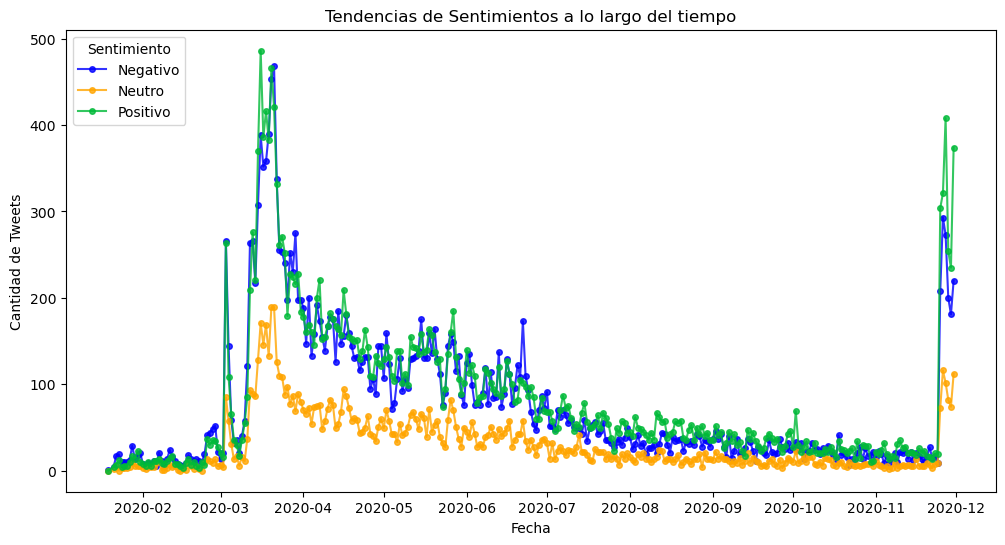

In [72]:
# Graficar las tendencias de sentimiento a lo largo del tiempo
sentiment_trends.plot(kind='line', figsize=(12, 6), marker='o', markersize=4, alpha = 0.8, color=['blue', 'orange', "#00ba38"])
plt.title('Tendencias de Sentimientos a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Tweets')
plt.legend(title='Sentimiento')
plt.show()

## Resultados
En el siguiente gráfico se puede contemplar como en marzo/abril en el año 2020 hubo un incremento de publicaciones tanto positivas como negativas en el cuadro del covid, esto se debe ya que el coronavirus comenzo a propagarse y a ser de mayor peligro en chile a principios del año 2020. Esto causo que varias personas expresen sus emociones en ese lapso de explosión que estaba viviendo chile en ese tiempo. 

## Realizamos un analisis en el aumento de Tweets entre Marzo y Abril del 2020
Para analizar el aumento de tweets entre marzo y abril de 2020 se utilizan tecnicas de análisis de texto y clustering.
Este foco del análisis en un período específico se debe a que en estas fechas se producieron un pico de actividades significativas. 

In [21]:
#Establecemos un rango de fechas para analizar.
start_date = "2020-03-01"
end_date = "2020-04-01"
#Creamos una máscara para seleccionar los tweets que caen dentro del rango.
mask = (df_subset_1['date'] >= start_date) & (df_subset_1['date'] <= end_date)
tweets_mar_apr = df_subset_1.loc[mask]

C:\Users\Guillermo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


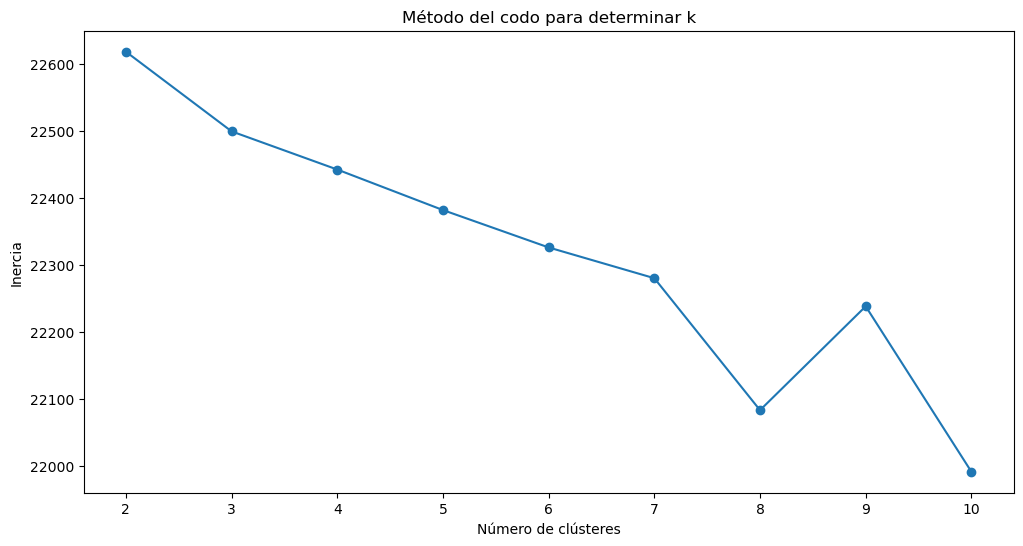

In [22]:
# Vectorizar los tweets para este período específico
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix_mar_apr = tfidf_vectorizer.fit_transform(tweets_mar_apr['clean_tweet'])

# Aplicar K-Means Clustering
# Determinar el número óptimo de clústeres (k)
# Aquí utilizamos un rango de 2 a 10
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix_mar_apr)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo para encontrar el mejor valor de k
plt.figure(figsize=(12, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Método del codo para determinar k')
plt.xlabel('Número de clústeres')
plt.ylabel('Inercia')
plt.show()

### Resumen
Se utilizan tecnicas como pueden ser TF-IDF y K-means para el análisis de texto e identificar patrones y agrupar documentos similares.
El "método del codo" te ayuda a seleccionar el número óptimo de clústeres. Se observa en el gráfico donde la inercia deja de disminuir rápidamente, indicando un equilibrio entre precisión y complejidad. Dicho método se implemento solamente para dejarnos una mejor interpretación y ayudarnos a elegir un cluster óptimo.

In [73]:
# Aplicar K-Means
k = 7
kmeans = KMeans(n_clusters=k, random_state=42)
clusters_mar_apr = kmeans.fit_predict(tfidf_matrix_mar_apr)

# Identificar los tweets más representativos para cada clúster
def find_representative_tweets(tfidf_matrix, kmeans_model, n_tweets=3):
    representative_tweets = {}
    centroids = kmeans_model.cluster_centers_
    
    for i in range(k):
        distances = cosine_similarity(tfidf_matrix[kmeans_model.labels_ == i], [centroids[i]])
        top_indices = distances.flatten().argsort()[-n_tweets:][::-1]
        representative_tweets[i] = tweets_mar_apr.iloc[top_indices].index.tolist()
    
    return representative_tweets

representative_tweets_mar_apr = find_representative_tweets(tfidf_matrix_mar_apr, kmeans)

# Mostrar los tweets más representativos de cada clúster
for cluster, tweet_indices in representative_tweets_mar_apr.items():
    print(f"Cluster {cluster}:")
    for index in tweet_indices:
        print(f"- {tweets_mar_apr.loc[index]['tweet']}")
    print("\n")

C:\Users\Guillermo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 0:
- BBC News - Coronavirus: 'Nothing ruled out' in government's virus battle tactics  https://t.co/9iuQlIdLHS
- #PabloIglesias ...Polémica en España: Gobierno compra a empresa china 340.000 test rápidos de covid-19 que están defectuosos  https://t.co/6gxWtFxtjm vía @emol
- Habemus #Covid_19 🥺


Cluster 1:
- Debería haber sido: “Afortunadamente, Coronavirus dio negativo a examen de Piñeravirus” #covid19chile #
- Oye avísenle a @jmanalich y al @ministeriosalud que suspendan por un mes las clases, tele trabajo... Aaaa no, van a dejar la caga con tal de no hacer el plebiscito. Hasta el loli perrito #Covid_19 #YoMeQuedoEnCasa #Chile #Apruebo #cuarentena #ULTIMAHORA
- Tarapacá se mantiene con 4 casos confirmados de coronavirus  https://t.co/zoOR6g96OF


Cluster 2:
- Desde que llegó el coronavirus a Chile haz pensado mucho en la extinción de la raza humana??
- 🔴Ministerio de Salud confirma primer caso de #COVID_19 en la Región de Atacama. Se trata de un adulto mayor de 50 años de eda

### Resumen Clustering
Analizando los tweets mas representativos de cada clúster, se puede inferir de que el aumento en la cantidad de tweets que se realizaron entre marzo y abril del año 2020, fueron a causa de la llegada del coronavirus a Chile y la preocupación que existió por su rápida propagación y medidas inneficientes por parte del gobierno.

# 3.- Construcción de un clasificador para determinar la orientación de las opiniones

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 'cleaned_tweet' es la columna con el texto del tweet y 'clean_class' la de las etiquetas
X = df_subset_1['cleaned_tweet']  # Texto del tweet
y = df_subset_1['clean_class']    # Etiqueta de sentimiento

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Se convierte el texto en vectores numéricos utilizando, TF-IDF.

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Modelos a comparar
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Random Forest": RandomForestClassifier()
}

# Entrenamiento de modelos
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    print(f"{name} ha sido entrenado.")

Naive Bayes ha sido entrenado.
Logistic Regression ha sido entrenado.
Random Forest ha sido entrenado.


In [26]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluación de los modelos
for name, model in models.items():
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Modelo: {name}")
    print(f"Exactitud: {accuracy}")
    print(classification_report(y_test, y_pred))

Modelo: Naive Bayes
Exactitud: 0.6992352941176471
                 precision    recall  f1-score   support

       Negativo       0.64      0.83      0.72      4844
         Neutro       0.54      0.02      0.04      1978
No Clasificable       0.82      0.70      0.75      4875
       Positivo       0.68      0.84      0.75      5303

       accuracy                           0.70     17000
      macro avg       0.67      0.60      0.57     17000
   weighted avg       0.69      0.70      0.66     17000

Modelo: Logistic Regression
Exactitud: 0.8234117647058824
                 precision    recall  f1-score   support

       Negativo       0.81      0.87      0.84      4844
         Neutro       0.68      0.17      0.28      1978
No Clasificable       0.85      0.96      0.90      4875
       Positivo       0.82      0.89      0.85      5303

       accuracy                           0.82     17000
      macro avg       0.79      0.73      0.72     17000
   weighted avg       0.81      

Observaciones de los resultados:

-Naive Bayes: Este modelo tiene una precisión razonable pero muestra una tendencia a ser mejor en la identificación de tweets "Negativos" y "Positivos", con un buen recall en estas categorías. Sin embargo, tiene un desempeño muy bajo en la categoría "Neutro", lo que indica que no es eficaz para identificar los tweets neutrales.

-Regresión logística: Este modelo es significativamente más preciso que Naive Bayes y Random Forest en este conjunto de datos. Tiene una alta precisión en todas las categorías y un buen equilibrio entre precisión y recall, lo que resulta en los mejores puntajes F1 de los tres modelos. La precisión es especialmente alta para "No Clasificable", lo que sugiere que este modelo es muy bueno para identificar tweets que no encajan claramente en categorías positivas o negativas.

-Random Forest: Aunque este modelo tiene una alta precisión en la categoría "Neutro", su recall es muy bajo, lo que significa que puede identificar correctamente los tweets neutros pero se le escapan muchos. Esto se refleja en el bajo puntaje F1 para esta categoría. Random Forest tiende a tener un mejor desempeño para los tweets "No Clasificable" y "Positivo", pero en general, su exactitud es la más baja de los tres modelos.

Se puede concluir que la regresión logística es el modelo más equilibrado y preciso para este conjunto de datos según los resultados obtenidos.

## Mejora de rendimiento del modelo de regresión logística

La validación cruzada es una técnica que permite evaluar la eficacia de un modelo de aprendizaje automático de una manera más rigurosa y menos sesgada que una simple división entre entrenamiento y prueba. A continuación se realizará el ajuste de hiperparámetros lo cuál ayudará a encontrar la configuración óptima para el rendimiento del modelo:

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Definir el modelo de regresión logística
logreg = LogisticRegression(solver='liblinear', max_iter=5000)

# Definir la cuadrícula de hiperparámetros para buscar
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Valores comunes para el parámetro de regularización C
    'penalty': ['l1', 'l2']  # l1 es Lasso y l2 es Ridge
}

# Configurar GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Realizar la búsqueda en la cuadrícula con validación cruzada
grid_search.fit(X_train_tfidf, y_train)

# Ver los mejores parámetros encontrados y la mejor puntuación
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor puntuación de validación cruzada (exactitud): {grid_search.best_score_}")

# Evaluar el mejor modelo encontrado en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_tfidf)
print(f"Exactitud en el conjunto de prueba: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Mejores parámetros: {'C': 10, 'penalty': 'l1'}
Mejor puntuación de validación cruzada (exactitud): 0.8690147058823531
Exactitud en el conjunto de prueba: 0.8695882352941177
                 precision    recall  f1-score   support

       Negativo       0.85      0.90      0.88      4844
         Neutro       0.78      0.38      0.51      1978
No Clasificable       0.90      0.98      0.94      4875
       Positivo       0.88      0.92      0.90      5303

       accuracy                           0.87     17000
      macro avg       0.85      0.80      0.81     17000
   weighted avg       0.86      0.87      0.86     17000

